# Anti-cancer activity prediction


* Anti-cancer activity prediction steps:-
    *   1- ✔️ Meme competition [optional]
    *   2- ✔️ Problem Formulation
    *   3- ✔️ Document your code
    *   4- ✔️ Model Tuning and Documentation
    *   5- ✔️ Answer some of questions (briefly)

1- ✔️ Meme competition [optional]:
* Include/find a MEME that you liked related to data science/data mining/machine learning. You can upload yours here
https://github.com/CISC-873/Information-2022/issues/1.

2- ✔️ Problem Formulation:
* Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

**Define the problem**

`Anticancer activity prediction, where each chemical compound is represented as a graph, with atoms representing nodes and bonds as edges. A chemical compound is positive against non-small cell lung cancer, or negative otherwise. Up to this point, you have learned various tricks and mechanisms to be used for building neural networks/tuning models.`

**What is the input?**

**Nodes** : `Each one contains atoms of the chemical compound in the tokenized form.`

**Edges** : `he relation between each node and others.`

**Node2graph** : `The input tensor which is used for segmented mean and contains information about segmented ids.`

**What is the output?** 

`we are going to predict if The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1. the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.`

**What data mining function is required?**

    * 1) Import the required Python libraries
    * 2) Read Data
    * 3) Data Preprocessing
    * 4) Virtualize the data
    * 5) Data Tokenizer.
    * 6) Data Padding.
    * 7) Data Split to Train and Test Sets and Reshape.
    * 8) Data resample.
    * 9) Data Concat.
    * 10) Embedding and Dense layers.
    * 11) Models that will be used:
    
           1) **GGNN Method** 

           2) **RGCN Method**

           3) **RGIN Method**
           
           3) **RGAT Method **
           
           3) **GNN-Edge-ML Method**
           
           3) **GNN-FILM Method**

**What could be the challenges?**
- How to deal with sdf file format
- How to make resampling
- How to find the best model architecture
- How to find the best hyperparameters
- How to avoid overfitting or undefitting
- How to improve the perormance of the models
- There are some models take a long time to run
  
**What is the impact?**

`Correct classification of chemical compound saves time and effort in treating the disease`

`Assist to predict the anticancer activity of a chemical compound using the chemical structure of the compound`
   
**What is an ideal solution?**

`The ideal 2 solutions I did are:
*Trial_6 * which give me this results 98.2% training AUC score and 98% validation AUC and 87.9% score on kaggle
*Trial_10 * which give me this results 98.5% training AUC score and 99% validation AUC and 88.67% score on kaggle (Rank-1)`

3- ✔️ Document your code

In [8]:
!pip install --quiet networkx # Install the NetworkX library
!pip install --quiet tf2_gnn # Install the tf2_gnn package

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [9]:
# Import the necessary Python libraries
import math              # Mathematical functions
import random            # Random number generation
import numpy as np       # Numerical computing with Python
import collections       # Container datatypes
import pandas as pd      # Data manipulation and analysis
import networkx as nx    # Network analysis and visualization
import tensorflow as tf  # Open source machine learning framework
from tensorflow import keras
from matplotlib import cm # Color maps for visualizations
from tqdm.notebook import tqdm # Progress bars for loops
import matplotlib.pyplot as plt # Plotting library
from sklearn.utils import resample # Import the resample function from scikit-learn
from tf2_gnn.layers.gnn import GNN, GNNInput # Import the GNN and GNNInput classes from the tf2_gnn.layers.gnn module
from tensorflow.math import segment_mean # Segment mean function from TensorFlow math module
from tensorflow.keras import Input, Model # Keras functional API
from tensorflow.keras.optimizers import Adam # Adam optimizer
from tensorflow.keras.layers import Embedding, Dense # Keras layers for neural networks
from sklearn.model_selection import train_test_split # Splitting data into training and testing sets
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenizing text data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Padding sequences of variable length

## Data Loading and Exploration Fuction 

- The function reads an SDF file (a type of file format used in chemistry) and returns a list of sample.
- where each sample is represented as a tuple containing three elements:
    -  A list of nodes, 
    -  A list of links (edges), 
    -  A label. 
- The parse_sample() function is a nested function within read_sdf() that takes a single sample as input, and returns the nodes, links, and label for that sample.
- The tqdm is a progress bar library that is used to show the progress of the loop.

In [10]:
def read_sdf(file):
    # Open the file for reading
    with open(file, 'r') as rf:
        # Read the entire contents of the file into a string
        content = rf.read()
        # Split the content string into individual samples
        # Each sample is separated by the string '$$$$'
        samples = content.split('$$$$') 
    def parse_sample(s):
        # Split the sample string into individual lines
        lines = s.splitlines()
        # Initialize empty lists for nodes and links
        nodes = []
        links = []
        # Initialize the label to 0
        label = 0
        # Loop through each line in the sample
        for l in lines:
            # If the line contains '1.0', set the label to 1
            if l.strip() == '1.0':
                label = 1    
            # If the line contains '-1.0', set the label to 0
            if l.strip() == '-1.0':
                label = 0     
            # If the line starts with four spaces, it contains a node
            if l.startswith('    '):
                # Split the line into its components
                feature = l.split()
                # Extract the node ID and add it to the list of nodes
                node = feature[3]
                nodes.append(node)   
            # If the line starts with a space, it contains an edge
            elif l.startswith(' '):
                # Split the line into its components
                lnk = l.split()
                
                # Extract the source and target nodes for the edge
                # and add the edge to the list of links
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1,  # Subtract 1 to convert from 1-based to 0-based indexing
                        int(lnk[1])-1,  # Subtract 1 to convert from 1-based to 0-based indexing
                    ))         
        # Return the list of nodes, the list of links, and the label
        return nodes, np.array(links), label
    # Parse each sample in the list of samples, but only keep samples with non-empty nodes
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]

In [11]:
from sklearn.model_selection import train_test_split
training_set = read_sdf('/kaggle/input/cisc873-dm-w23-a6/train.sdf')
testing_set  = read_sdf('/kaggle/input/cisc873-dm-w23-a6/test_x.sdf')
print('length of Tr_df:', len(training_set) ,'length of Ts_df:',len(testing_set))
print('length of Tr_df[0]:', len(training_set[0]),'length of Ts_df[0]:',len(testing_set[0]))
training_set, validation_set = train_test_split(training_set, test_size=0.2,)

  0%|          | 0/25024 [00:00<?, ?it/s]

  0%|          | 0/12326 [00:00<?, ?it/s]

length of Tr_df: 25024 length of Ts_df: 12326
length of Tr_df[0]: 3 length of Ts_df[0]: 3


In [5]:
print(training_set[1])

(['O', 'O', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  2],
       [ 0, 12],
       [ 1, 24],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 3,  6],
       [ 3,  9],
       [ 4,  7],
       [ 4, 10],
       [ 5,  8],
       [ 5, 11],
       [ 6, 13],
       [ 7, 14],
       [ 8, 15],
       [ 9, 16],
       [10, 17],
       [11, 18],
       [12, 22],
       [13, 19],
       [14, 20],
       [15, 21],
       [16, 19],
       [17, 20],
       [18, 21],
       [22, 23],
       [23, 24],
       [24, 25]]), 0)


- This code creates a list of labels by iterating over each sample in the training_set.
- It then uses the collections.
- Counter function to count the number of occurrences of each label. 
- Finally, it loops over the label counts and prints them out.

In [6]:
labels = [sample[2] for sample in training_set] # Get the labels from the training set
label_counts = collections.Counter(labels) # Count the number of occurrences of each label
for label, count in label_counts.items(): # Print the label counts
    print(f"Label {label}: {count} samples")

Label 0: 19040 samples
Label 1: 979 samples


#### From above result, we have unbalanced data, we need more sample for label 1

## Visualizing/Inspecting a Sample

In [7]:
colors = cm.rainbow(np.linspace(0, 1, 50)) # Create a color map with 50 colors from the rainbow colormap

* The function first creates an empty graph object G. It then extracts the nodes and edges from the sample and loops through each node, adding it to the graph with a unique ID and storing its label in a dictionary. It also chooses a color for each node based on its label by hashing the label and using the result to index into the colors array.

* The function then loops through each edge in the sample and adds it to the graph.

* Finally, the function uses NetworkX's draw function to draw the graph with the node labels and colors, and displays it using Matplotlib's show function. The function returns the graph object.

In [4]:
# Define a function for visualizing a single sample
def visualize(sample):
    # Create a new empty graph
    G = nx.Graph()
    # Extract the nodes and edges from the sample
    nodes = sample[0]
    edges = sample[1]
    # Create a dictionary to map node IDs to their labels
    labeldict = {}
    # Create a list to store the colors of each node 
    node_color = [] 
    # Loop through each node in the sample
    for i, n in enumerate(nodes):
        # Add the node to the graph with a unique ID
        G.add_node(i)  
        # Add the node label to the label dictionary
        labeldict[i] = n
        # Choose a color for the node based on its label
        node_color.append(colors[hash(n) % len(colors)])     
    # Loop through each edge in the sample
    for e in edges:
        # Add the edge to the graph
        G.add_edge(e[0], e[1])    
    # Draw the graph using NetworkX's draw function
    nx.draw(G, labels=labeldict, with_labels=True, node_color=node_color)
    # Show the plot
    plt.show() 
    # Return the graph object
    return G

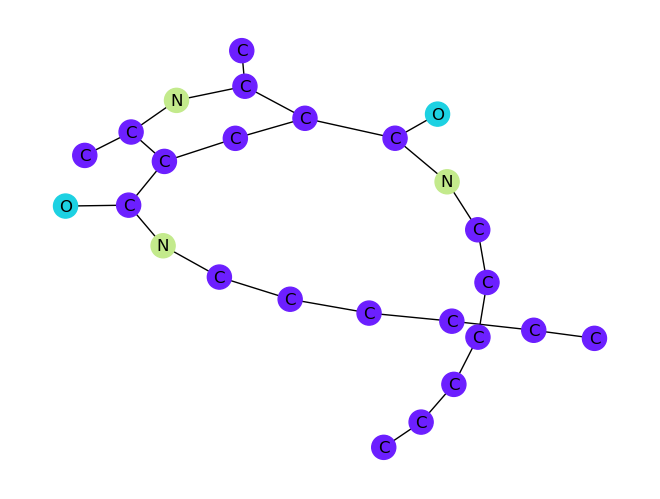

In [9]:
visualize(training_set[5]) #visualize sample

## Preprocessing For Data

* This code uses the Keras library to preprocess the text data in the training set. 
* It first sets the maximum vocabulary size (max_vocab) and sequence length (max_len) that will be used for training the model.


* The code then extracts all nodes from the training set and stores them in the all_nodes list. 
* This list is used to fit a Tokenizer object, which is created with a num_words parameter set to max_vocab. 
* This tokenizer object will be used to convert the node labels into sequences of integers that can be fed into the model.


* The fit_on_texts method of the tokenizer is called with all_nodes as its argument. 
* This method updates the internal vocabulary based on the text data in all_nodes. 
* Once the tokenizer is fitted on the training data, it can be used to convert the text data to sequences of integers using the texts_to_sequences method.

In [12]:
# Set the maximum vocabulary size and sequence length
max_vocab = 500
max_len = 100

# Extract all nodes from the training set
all_nodes = [s[0] for s in training_set]

# Create a tokenizer object and fit it on the nodes
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

* This code defines a function prepare_single_batch that takes a list of samples as input and prepares them for training the model.

* The function first sets the random seed to ensure reproducibility. It then extracts the node labels from the samples and converts them to sequences of integers using the tokenizer.texts_to_sequences method. The sequences are padded to ensure they all have the same length using the pad_sequences method.

* The function then concatenates the edge lists for each sample into a single list and creates a mapping from node index to sample index for each node in the batch.

* Finally, the function flattens the node and edge arrays and returns the prepared batch as a dictionary of inputs and output labels. The inputs consist of the flattened node and edge arrays, as well as the node-to-graph mapping. The output labels are extracted from the original samples.

In [13]:
random.seed(0) # Set the random seed to ensure reproducibility
# Define a function for preparing a single batch of samples
def prepare_single_batch(samples):
    # Extract the node labels from the samples and convert them to sequences of integers
    sample_nodes = [s[0] for s in samples]
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes) 
    # Pad the sequences to ensure they all have the same length
    sample_nodes = pad_sequences(sample_nodes, padding='post')
    # Get the maximum node length for this batch
    max_nodes_len = np.shape(sample_nodes)[1]
    # Concatenate the edge lists for each sample into a single list
    edges = [s[1] + i * max_nodes_len for i, s in enumerate(samples)]
    edges = [e for e in edges if len(e) > 0]
    # Create a mapping from node index to sample index for each node in the batch
    node_to_graph = [[i] * max_nodes_len for i in range(len(samples))]
    # Flatten the node and edge arrays
    all_nodes = np.reshape(sample_nodes, -1)
    all_edges = np.concatenate(edges)
    node_to_graph = np.reshape(node_to_graph, -1)
    # Return the prepared batch as a dictionary of inputs and output labels
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])

* This code defines a function gen_batch that takes a dataset, batch size, and other parameters as input, and generates batches of prepared samples for training the model.

* The function first enters an infinite loop with a while True statement. Within this loop, the function converts the dataset to a list and shuffles it (if shuffle=True).

* The function then gets the length of the dataset and loops over it in batches of size batch_size, using the range function. For each batch, the function gets the current batch of samples and prepares it for training using the prepare_single_batch function. The prepared batch is then yielded using the yield statement.

* After processing the entire dataset once, the function checks if repeat=False. If so, it breaks out of the infinite loop and ends the function. If not, it continues looping indefinitely, shuffling the dataset each time.

In [14]:
# Define a function for generating batches of samples
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    # Loop indefinitely over the dataset
    while True:
        # Convert the dataset to a list and shuffle it (if shuffle=True)
        dataset = list(dataset)
        if shuffle:
            random.shuffle(dataset) 
        # Get the length of the dataset
        l = len(dataset) 
        # Loop over the dataset in batches of size batch_size
        for ndx in range(0, l, batch_size):
            # Get the current batch of samples
            batch_samples = dataset[ndx:min(ndx + batch_size, l)]    
            # Prepare the batch for training
            batch_data, batch_labels = prepare_single_batch(batch_samples)  
            # Yield the prepared batch
            yield batch_data, batch_labels
        # If repeat=False, stop looping after processing the entire dataset once
        if not repeat:
            break

## Model Structure  

#### Virtualization Method

In [15]:
def results_virt(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('Model Results')
  
  #first plot
  # first we display the training accuracy in red color VS. the validation accuracy in blue color through the epochs
  ax1.plot(history.history['auc'], 'r')
  ax1.plot(history.history['val_auc'], 'b')
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()

  #second plot
  # on this axis, we plot the training loss in red color VS. the validation loss in blue color through the epochs
  ax2.plot(history.history['loss'], 'r')
  ax2.plot(history.history['val_loss'], 'b')
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_loss', 'val_loss'])
  ax2.grid()

# display the figure
  plt.show() 

4- ✔️ Model Tuning and Documentation

In [16]:
# defines a function named GNN_model that takes in six parameters: n, condition, dropout_ratio, hidden_layers, mode, and par.
def GNN_model(n, condition, dropout_ratio, hidden_layers, mode, par):
# Define input layers
    data = keras.Input(batch_shape=(None,))  # Node features
    edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)  # Edge indices (2D)
    node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)  # Node-to-graph mapping
# Embed the input data
    embeded = Embedding(tokenizer.num_words, 100)(data)
# Compute the number of graphs (i.e., number of samples)
    num_graph = tf.reduce_max(node2graph) + 1
# Define the input to the GNN layer
    gnn_input = GNNInput(
        node_features=embeded,#The node_features parameter specifies the embedded node features
        adjacency_lists=(edge,),#the adjacency_lists parameter specifies the edge indices
        node_to_graph_map=node2graph,#the node_to_graph_map parameter specifies the node-to-graph mapping
        num_graphs=num_graph, #the num_graphs parameter specifies the number of graphs in the input batch.
    )
# Set hyperparameters for the GNN layer
    params = GNN.get_default_hyperparameters()
    params["hidden_dim"] = n  # Hidden dimension of the GNN layer
    params["num_heads"] = 8
    params["use_inter_layer_layernorm"] = condition  # Use inter-layer layer normalization
    params["layer_input_dropout_rate"] = dropout_ratio  # Dropout rate for the input to each layer
    params['num_aggr_MLP_hidden_layers'] = hidden_layers  # Number of hidden layers in the MLP used for message aggregation
    params["global_exchange_mode"] = mode  # Global exchange mode
    params['message_calculation_class'] = par  # Message calculation method
# Create the GNN layer and apply it to the input
    gnn_layer = GNN(params)        #GNN layer with the specified hyperparameters.
    gnn_out = gnn_layer(gnn_input) #applies the GNN layer to the input to obtain graph-level embeddings.
# computes the mean of the graph-level embeddings, where each graph is identified by its corresponding value in node2graph.
    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )
# Define the fully connected layers for classification
    l1 = Dense(64, activation='relu')(avg)
    l2 = Dense(64, activation='relu')(l1)
    pred = Dense(1, activation='sigmoid')(l2)
# Define the model with inputs and outputs
    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2grah': node2graph,
        },
        outputs=pred
    )
    return model

* This function will print the model summary, compile the model with the specified loss and metrics, train the model, generate predictions on the testing set, and save the predictions to a CSV file. 
* It then reads the CSV file and returns the model summary (as a string), the contents of the CSV file (as a string), and the history object. 
* Note that the history object will contain information about the training and validation losses and metrics, which can be passed to the results_virt function for visualization.

In [17]:
def Fit_Pred_Save(model,Optimizer,Batch_size,epc,Num_Trial):
# Set batch size and compute number of batches for training and validation sets
    batch_size = Batch_size
    num_batchs = math.ceil(len(training_set) / batch_size)
    num_batchs_validation = math.ceil(len(validation_set) / batch_size)

# Print the model summary
    model_summary = model.summary()

# Compile the model with specified loss and metrics
    model.compile(optimizer=Optimizer,loss='BinaryCrossentropy', metrics=['AUC'] )

# Train the model and store the history object
    history = model.fit(
        gen_batch(training_set, batch_size=batch_size, repeat=True),  # Training data generator
        steps_per_epoch=num_batchs,  # Number of batches per epoch
        epochs=epc,  # Number of epochs
        validation_data=gen_batch(validation_set, batch_size=16, repeat=True),  # Validation data generator
        validation_steps=num_batchs_validation,)  # Number of validation steps per epoch
    
# Generate predictions on the testing set
    y_pred = model.predict(gen_batch(testing_set, batch_size=16, shuffle=False))
    y_pred = np.reshape(y_pred, -1)  # Reshape predictions into a 1D array

# Create a submission file for the Kaggle competition

    submission = pd.DataFrame({'label':y_pred})  # Create a DataFrame for the predictions
    submission.index.name = 'id'  # Set the index name
    submission.to_csv(f'sample_submission_{Num_Trial}.csv')  # Save the predictions to a CSV file

# Read the CSV file and return the model summary, CSV file, and history object
    with open(f'sample_submission_{Num_Trial}.csv', 'r') as f:
        csv_file = f.read()
    
    return model_summary, csv_file, history

# Trial 1(No Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=False, 
    * dropout_ratio=0, 
    * hidden_layers=12, 
    * mode='gru',  
    * par='rgcn'. Relational Graph Convolutional Networks Mechanism(RGCN)

In [16]:
Model_1=GNN_model(32,False,0,12,'gru','rgcn')

In [20]:
summary, csv_file, history = Fit_Pred_Save(Model_1,'Adam',16,30,1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0           ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 embedding (Embedding)          (None, 100)          50000       ['input_1[0][0]']            

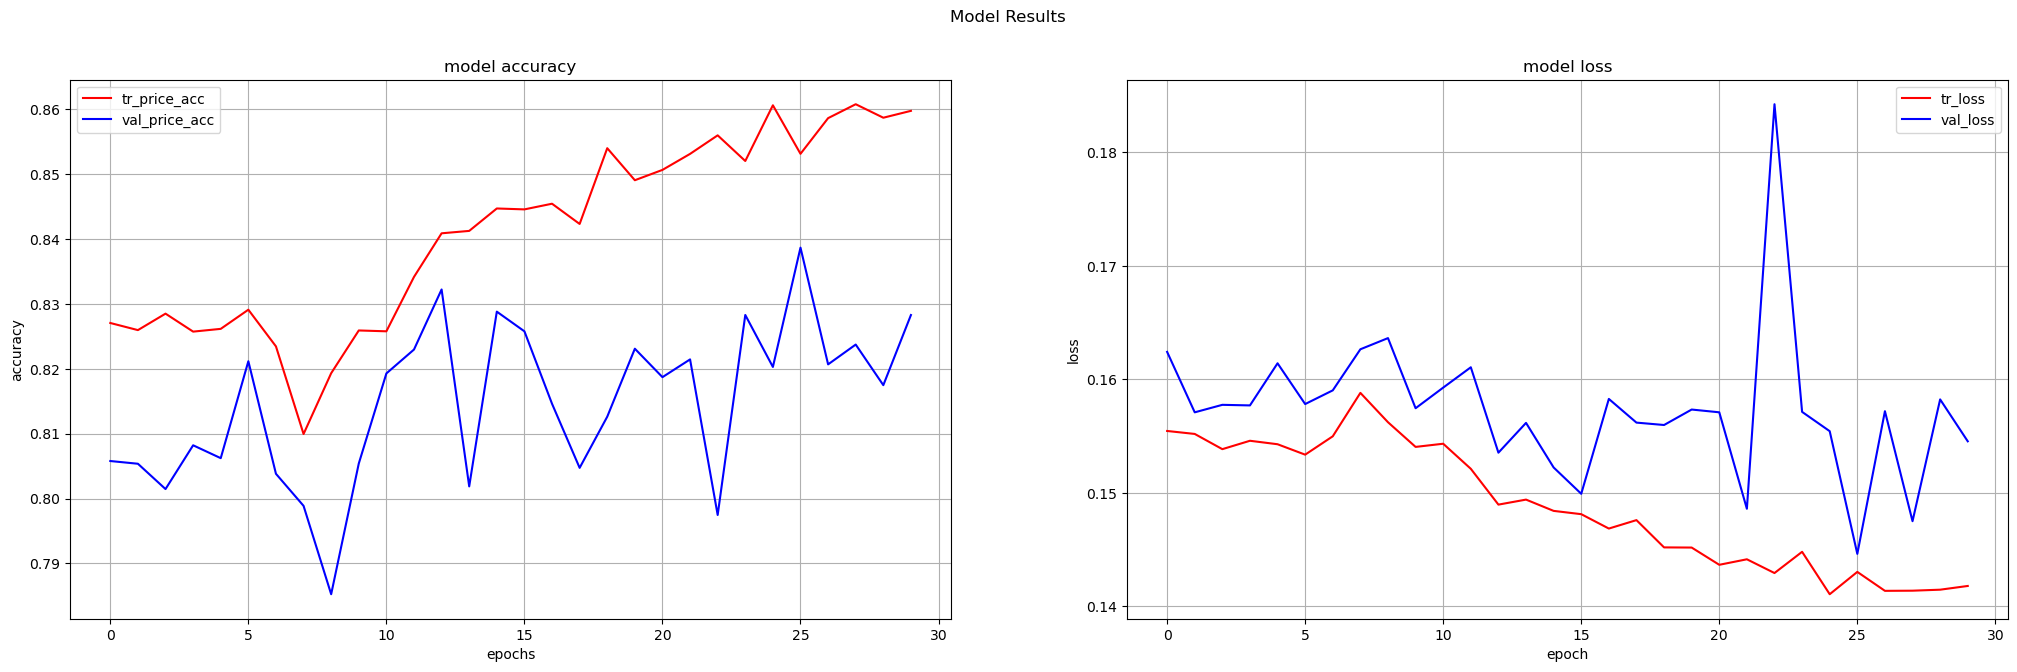

In [21]:
results_virt(history)

**Observation_1**
* First, I used Relational Graph Convolutional Networks Mechanism(RGCN).

* when I used Adam optimizer I noticed that accuracy was increased clearly

* with batch size 16 and epoch 30

* I get Score: 0.86 /Public score: 0.79057

# Trial 2(No Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=False, 
    * dropout_ratio=0, 
    * hidden_layers=12, 
    * mode='gru',  
    * par='ggnn'. Gated Graph Neural Networks mechanism 

In [22]:
Model_2=GNN_model(32,False,0,12,'gru','ggnn')

In [23]:
summary, csv_file, history = Fit_Pred_Save(Model_2,'Adam',16,30,2)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()                  0           ['input_6[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_1 (Embedding)        (None, 100)          50000       ['input_4[0][0]']          

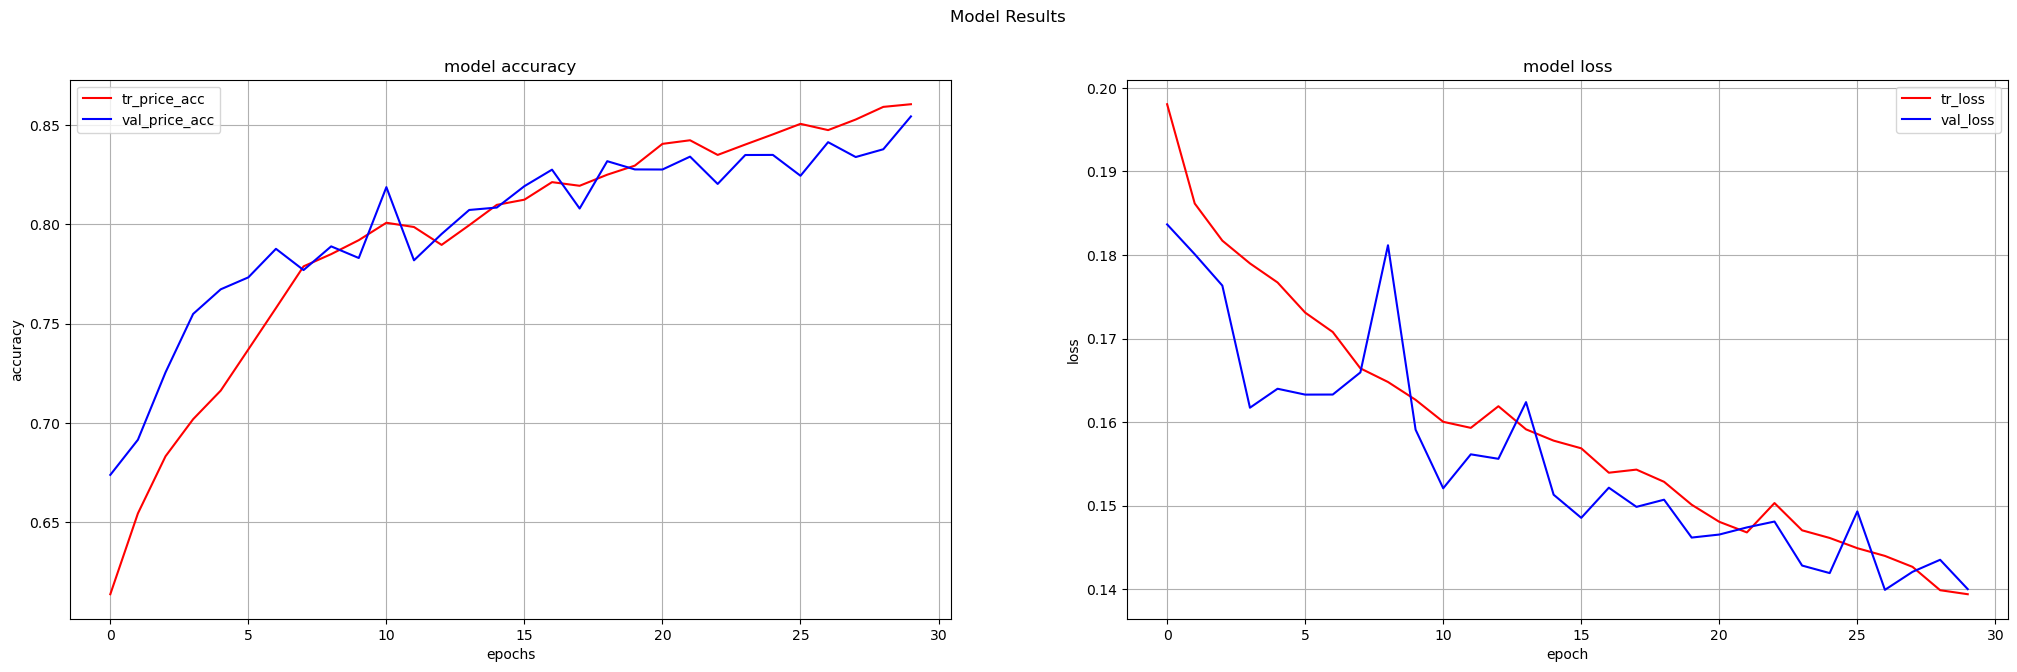

In [24]:
results_virt(history)

**Observation_2**
* First, I used Gated Graph Neural Networks mechanism(GGNN).

*  I used Adam optimizer I noticed that accuracy was increased clearly

* The batch size 16 and epoch 30

* I get Score: 0.86 /Public score: 0.85863

# Trial 3(No Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=False, 
    * dropout_ratio=0, 
    * hidden_layers=10, 
    * mode='gru',  
    * par='rgin'. Relational Graph Isomorphism Networks mechanism 

In [25]:
Model_3=GNN_model(32,False,0,10,'gru','rgin')

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")  
summary, csv_file, history = Fit_Pred_Save(Model_3,opt,16,30,3)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_2 (TFOpLamb  ()                  0           ['input_9[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_2 (Embedding)        (None, 100)          50000       ['input_7[0][0]']          

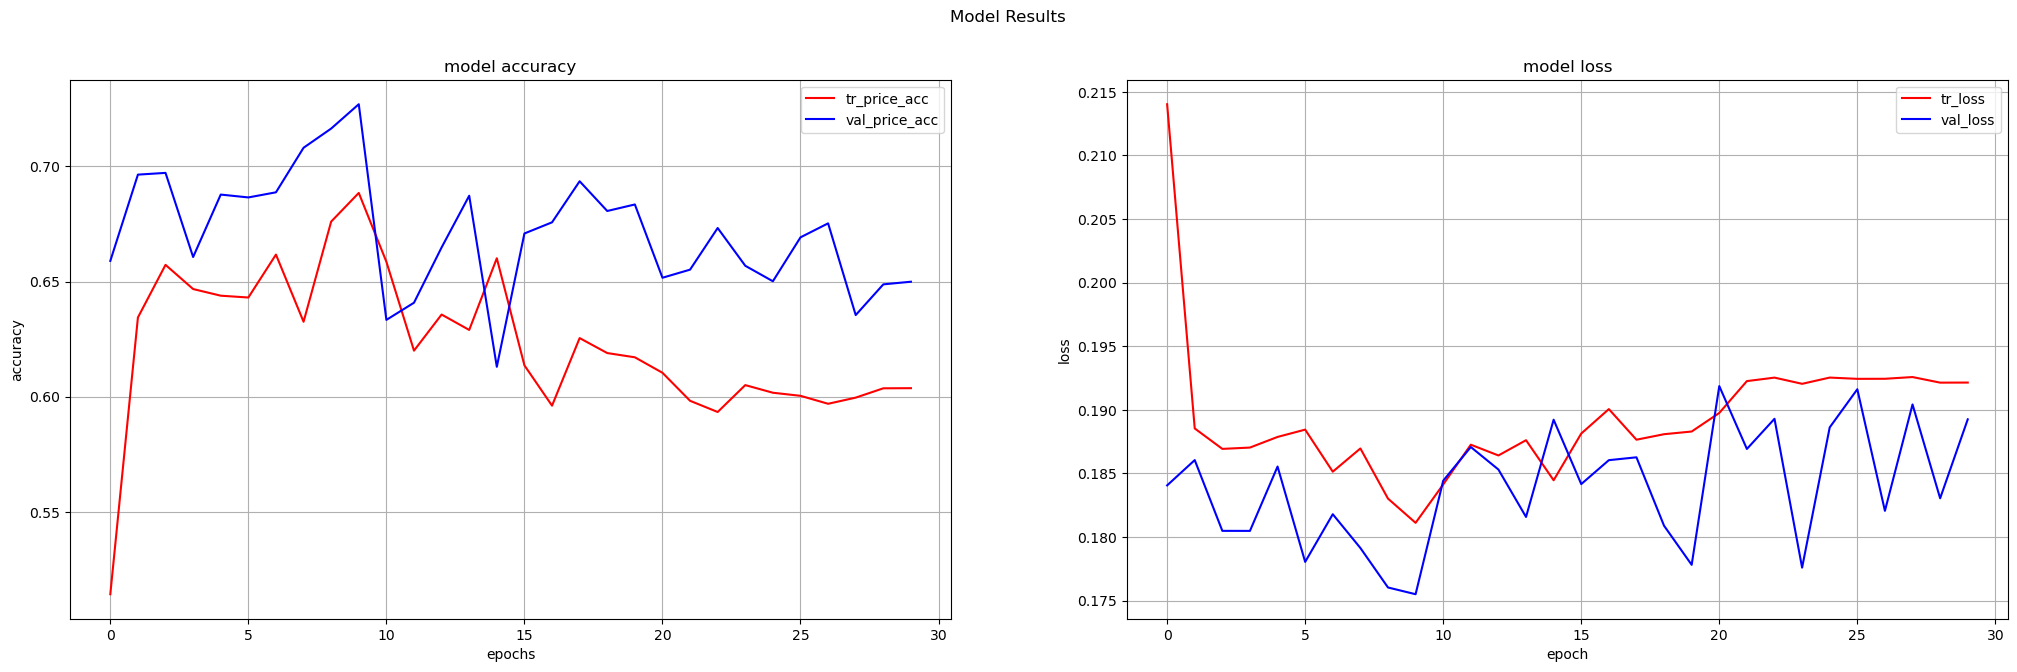

In [27]:
results_virt(history)

**Observation_3**
* First, I used Relational Graph Isomorphism Networks mechanism(RGIN).

*  I used Adam optimizer I noticed that accuracy was decreased clearly

* The batch size 16 and epoch 30

* I get Score: 0.65 /Public score: 0.68

# Trial 4(No Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0.2, 
    * hidden_layers=12, 
    * mode='mean',  
    * par='rgcn'. Relational Graph Convolutional Networks Mechanism(RGCN)

In [28]:
Model_4=GNN_model(32,True,0.2,12,'mean','rgcn')

In [29]:
summary, csv_file, history = Fit_Pred_Save(Model_4,'adam',16,30,4)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  ()                  0           ['input_12[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_3 (Embedding)        (None, 100)          50000       ['input_10[0][0]']         

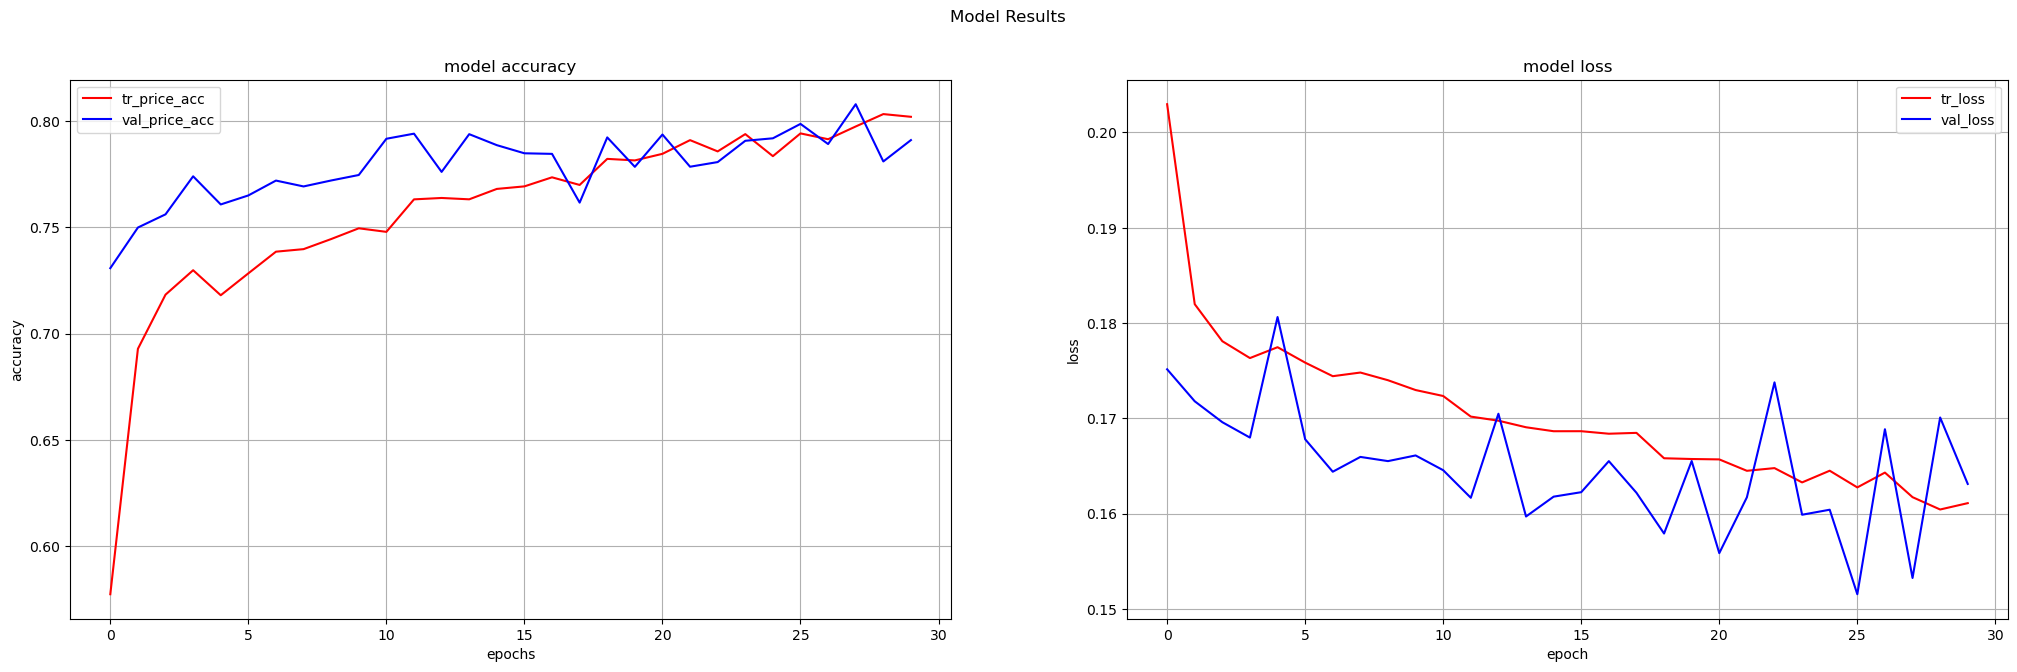

In [30]:
results_virt(history)

**Observation_4**
* First, I used Relational Graph Convolutional Networks Mechanism(RGCN).

*  I used Adam optimizer I noticed that accuracy was increased again.

* The batch size 16 and epoch 30

* I get Score: 0.80 /Public score: 0.81

# Trial 5(No Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0.2, 
    * hidden_layers=12, 
    * mode='mean',  
    * par='GGNN'. Gated Graph Neural Networks mechanism

In [31]:
Model_5=GNN_model(32,True,0.2,12,'mean','ggnn')

In [32]:
summary, csv_file, history = Fit_Pred_Save(Model_5,'adam',16,30,5)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_4 (TFOpLamb  ()                  0           ['input_15[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_4 (Embedding)        (None, 100)          50000       ['input_13[0][0]']         

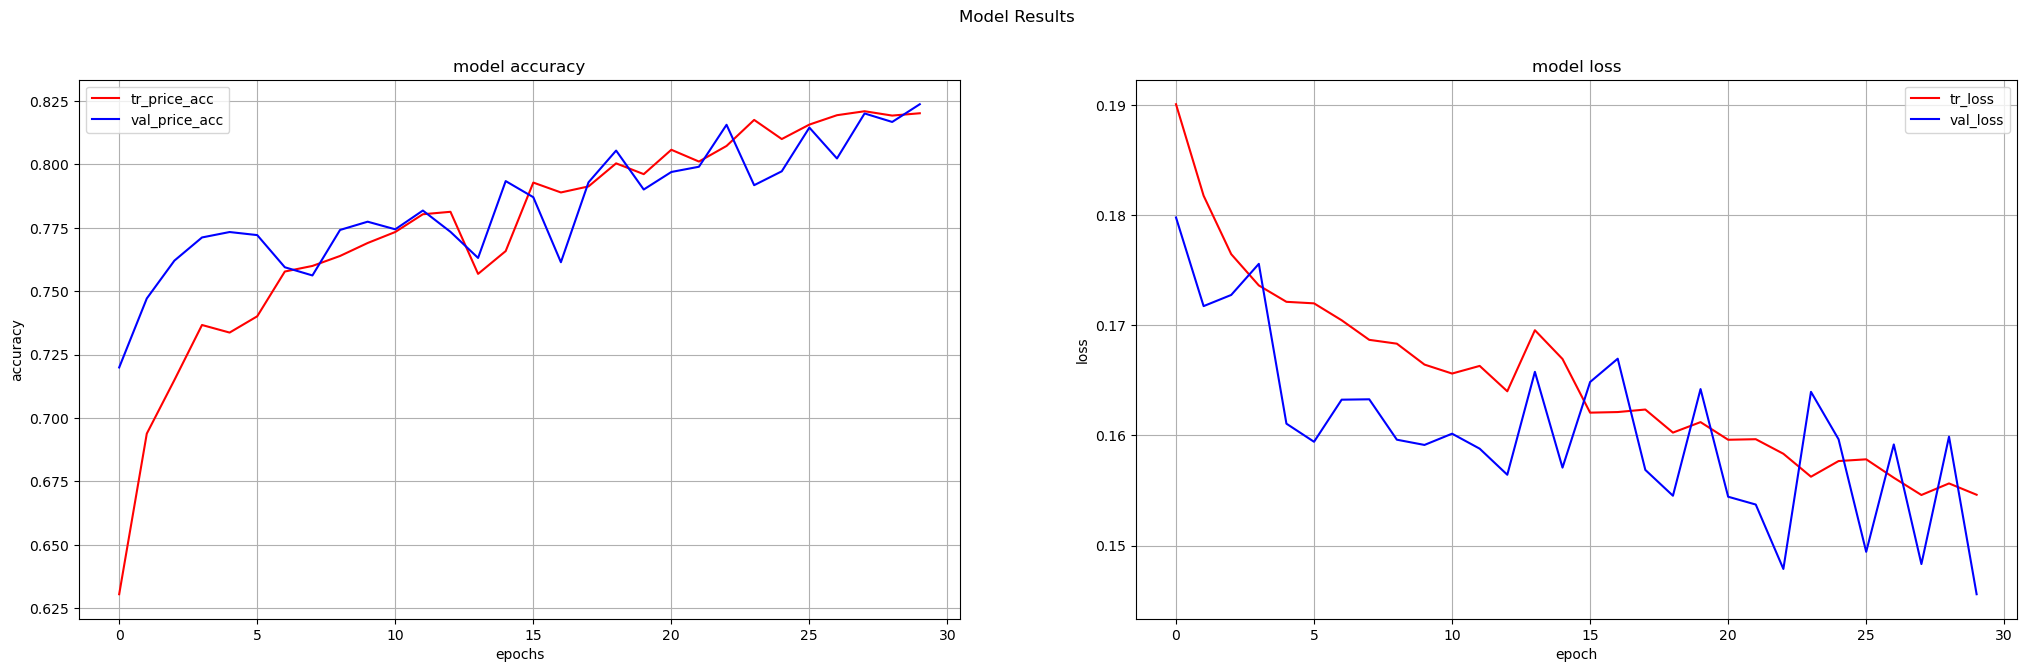

In [33]:
results_virt(history)

**Observation_5**
* First, I used Gated Graph Neural Networks mechanism(GGNN).

*  I used Adam optimizer I noticed that accuracy was increased again but after apply dropout 

* The batch size 16 and epoch 30

* I get Score: 0.82 /Public score: 0.84

# Apply Upsampling

* Upsampling is a procedure where synthetically generated data points (corresponding to minority class) are injected into the dataset. After this process, the counts of both labels are almost the same. This equalization procedure prevents the model from inclining towards the majority class.

# Again Data preprocessing 

In [18]:
training_set = read_sdf('/kaggle/input/cisc873-dm-w23-a6/train.sdf')
testing_set  = read_sdf('/kaggle/input/cisc873-dm-w23-a6/test_x.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

  0%|          | 0/12326 [00:00<?, ?it/s]

In [19]:
labels = [sample[2] for sample in training_set] # Get the labels from the training set
label_counts = collections.Counter(labels) # Count the number of occurrences of each label
for label, count in label_counts.items(): # Print the label counts
    print(f"Label {label}: {count} samples")

Label 0: 23806 samples
Label 1: 1218 samples


In [20]:
from pandas.core.frame import DataFrame
DataFrame(np.array(training_set)) #convert to data frame to be able to split ones and zeros classes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


,0,1,2
0,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 11], [3, 7], [4...",0
1,"[O, O, O, O, O, O, N, N, N, C, C, C, C, C, C, ...","[[0, 6], [0, 15], [1, 15], [2, 7], [3, 8], [4,...",0
2,"[F, F, F, O, O, O, O, O, N, N, C, C, C, C, C, ...","[[0, 19], [1, 19], [2, 19], [3, 16], [4, 28], ...",0
3,"[Cl, S, S, O, O, O, O, N, N, N, N, C, C, C, C,...","[[0, 12], [1, 15], [1, 18], [2, 4], [2, 5], [2...",0
4,"[S, O, O, N, N, N, N, N, N, C, C, C, C, C, C, ...","[[0, 1], [0, 2], [0, 5], [0, 9], [3, 4], [3, 1...",0
...,...,...,...
25019,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 12], [3, 13], [...",0
25020,"[O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, ...","[[0, 9], [1, 11], [2, 16], [2, 19], [3, 16], [...",0
25021,"[O, O, O, O, O, O, O, O, O, N, C, C, C, C, C, ...","[[0, 12], [0, 16], [1, 10], [2, 11], [3, 15], ...",0
25022,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 11], [0, 12], [1, 21], [1, 27], [2, 22], ...",0


In [21]:
DataFrame(np.array(training_set)).rename(columns = {0:'nodes', 1:'edges',2:'label'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:ylabel='Type'>

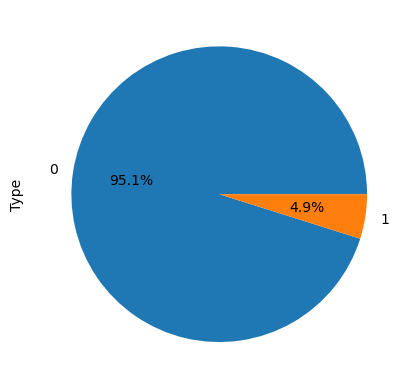

In [22]:
# To visualize the label class 
DataFrame(np.array(training_set)).groupby(2).size().plot(kind='pie',
                                       y = DataFrame(np.array(training_set))[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [23]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [24]:
from sklearn.utils import resample
resampling = X_train.copy()
resampling[2] = y_train.values
class_0 = resampling[resampling[2]==0]
class_1 = resampling[resampling[2]==1]
class_1_after = resample(class_1, replace=True,n_samples=23806)
df_upsampled = pd.concat([class_0, class_1_after])

In [25]:
# Display new class counts
df_upsampled[2].value_counts()

0    23806
1    23806
Name: 2, dtype: int64

<AxesSubplot:ylabel='Type'>

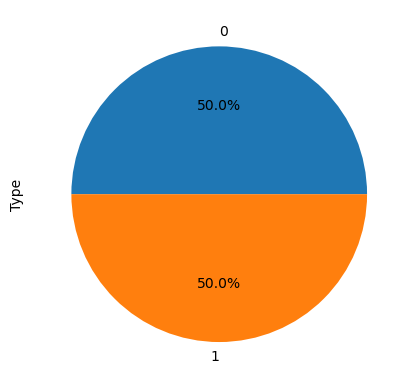

In [26]:
#visualize data 
df_upsampled.groupby(2).size().plot(kind='pie',
                                       y = df_upsampled[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [27]:
training_set = df_upsampled.values.tolist() # to return data from dataframe to arry

In [28]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():          #k: labels, v: values
        print(k)
        print(v)
        #print(len(v))
        pass
    print('label', train_batch[1])
    break

data
[2 2 2 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 4 4 3 3 3 3 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 3 3 3 3 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 7 3
 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1]
edges
[[ 0  4]
 [ 0  6]
 [ 1  4]
 [ 2  7]
 [ 3  7]
 [ 4  9]
 [ 5 11]
 [ 5 15]
 [ 5 16]
 [ 6 10]
 [ 7 12]
 [ 8 17]
 [ 8 18]
 [ 8 19]
 [ 9 10]
 [ 9 11]
 [10 12]
 [11 13]
 [12 14]
 [13 14]
 [15 17]
 [16 18]
 [24 31]
 [24 32]
 [25 30]
 [25 33]
 [26 27]
 [26 31]
 [27 30]
 [28 29]
 [28 31]
 [29 30]
 [48 55]
 [49 50]
 [49 54]
 [50 55]
 [51 53]
 [51 57]
 [52 55]
 [52 61]
 [52 62]
 [53 54]
 [53 56]
 [54 59]
 [56 58]
 [57 60]
 [58 60]
 [72 93]
 [73 74]
 [73 83]
 [73 84]
 [74 88]
 [75 83]
 [75 87]
 [76 77]
 [76 84]
 [77 89]
 [78 82]
 [78 86]
 [79 87]
 [80 88]
 [81 89]
 [82 90]
 [83 86]
 [84 85]
 [85 87]
 [85 89]
 [86 88]
 [90 91]
 [90 92]
 [91 94]
 [92 95]
 [93 94]
 [93 95]]
node2grah
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 

# Trial 6(Apply Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0, 
    * hidden_layers=12, 
    * mode='mean',  
    * par='GGNN'. Gated Graph Neural Networks mechanism

In [45]:
Model_6=GNN_model(32,True,0,12,'mean','GGNN')

In [46]:
summary, csv_file, history = Fit_Pred_Save(Model_6,'adam',16,28,6)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_5 (TFOpLamb  ()                  0           ['input_18[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_5 (Embedding)        (None, 100)          50000       ['input_16[0][0]']         

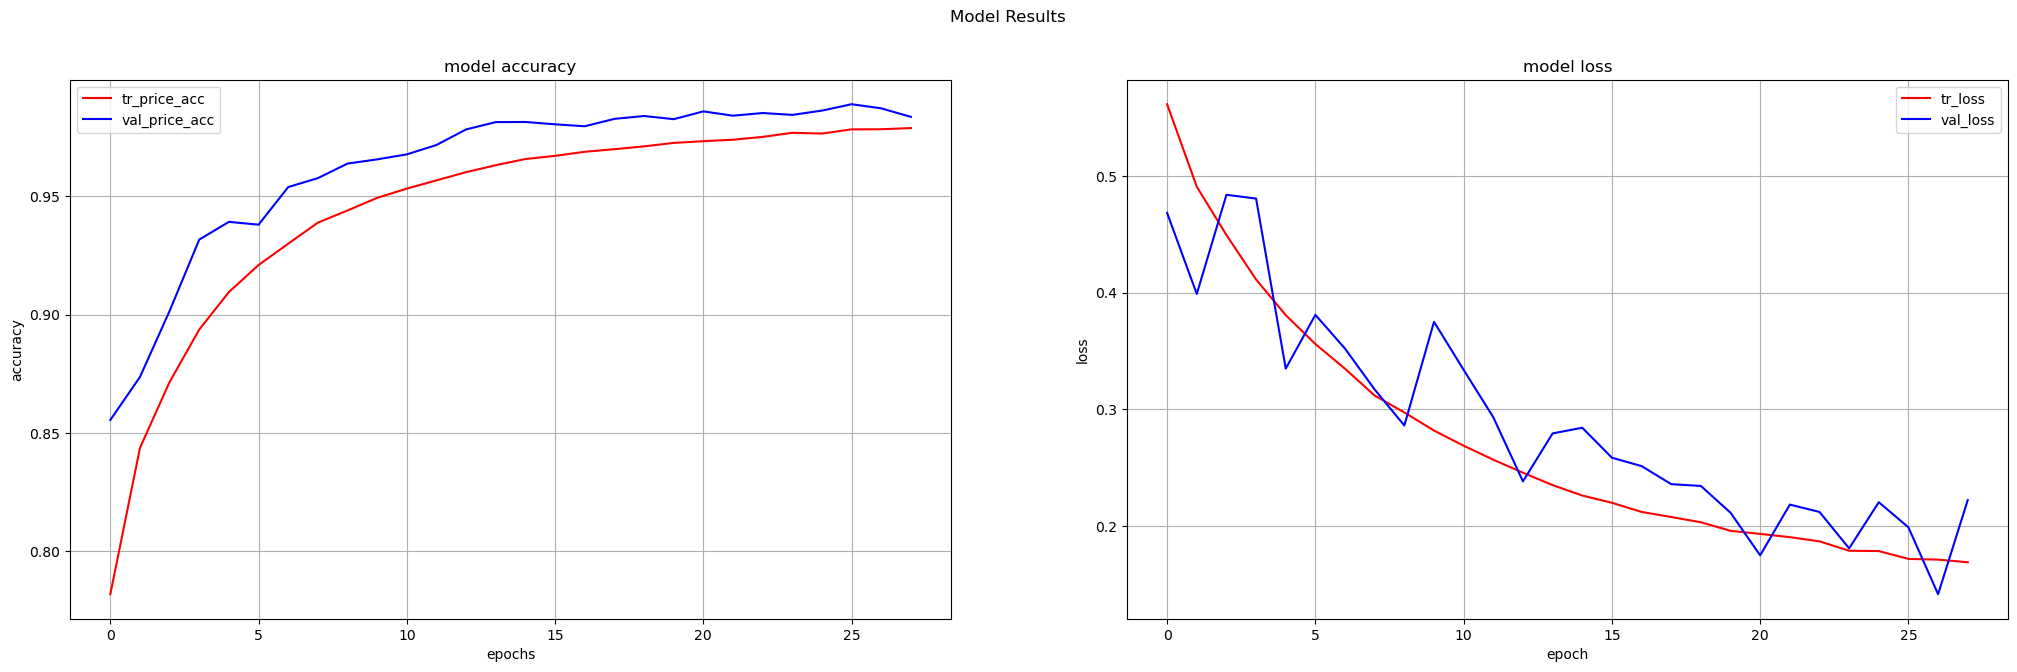

In [47]:
results_virt(history)

**Observation_6**
* First, I used Gated Graph Neural Networks mechanism(GGNN).

*  I used Adam optimizer I noticed that accuracy was highly increased again 

* The batch size 16 and epoch 28

* I get Score: 0.98 /Public score: 0.88

# Trial 7(Apply Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0.1, 
    * hidden_layers=12, 
    * mode='mean',  
    * par='gnn_edge_mlp'.'Graph Neural Networks-Edge classification'

In [48]:
Model_7=GNN_model(32,True,0.1,12,'mean','gnn_edge_mlp')

In [49]:
summary, csv_file, history = Fit_Pred_Save(Model_7,'adam',32,18,7)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  ()                  0           ['input_21[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_6 (Embedding)        (None, 100)          50000       ['input_19[0][0]']         

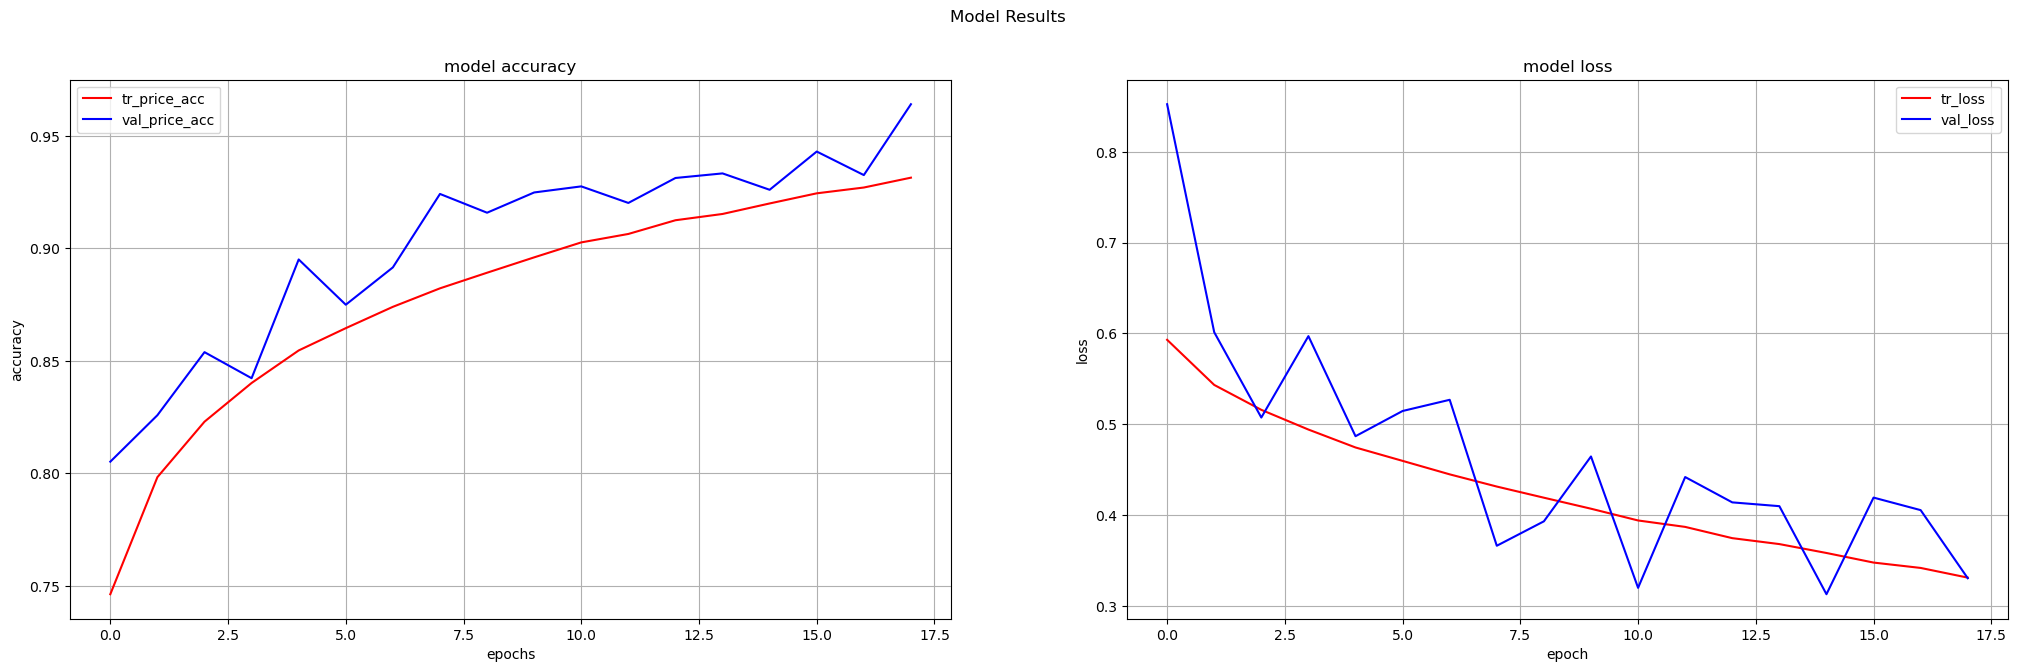

In [50]:
results_virt(history)

**Observation_7**
* First, I used Gated Graph Neural Networks(GGN-Edge-mlp).

*  I used Adam optimizer I noticed that accuracy was good. 

* The batch size 16 and epoch 25

* I get Score: 0.96 /Public score: 0.83.5

# Trial 8(Apply Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0, 
    * hidden_layers=4, 
    * mode='mean',  
    * par='GNN_FiLM'.'Graph Neural Networks with Feature-wise Linear Modulation'

In [51]:
# defines a function named GNN_model that takes in six parameters: n, condition, dropout_ratio, hidden_layers, mode, and par.
def GNN_model_Film(n, condition, dropout_ratio, hidden_layers, mode, par):
# Define input layers
    data = keras.Input(batch_shape=(None,))  # Node features
    edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)  # Edge indices (2D)
    node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)  # Node-to-graph mapping
# Embed the input data
    embeded = Embedding(tokenizer.num_words, 100)(data)
# Compute the number of graphs (i.e., number of samples)
    num_graph = tf.reduce_max(node2graph) + 1
# Define the input to the GNN layer
    gnn_input = GNNInput(
        node_features=embeded,#The node_features parameter specifies the embedded node features
        adjacency_lists=(edge,),#the adjacency_lists parameter specifies the edge indices
        node_to_graph_map=node2graph,#the node_to_graph_map parameter specifies the node-to-graph mapping
        num_graphs=num_graph, #the num_graphs parameter specifies the number of graphs in the input batch.
    )
# Set hyperparameters for the GNN layer
    params = GNN.get_default_hyperparameters()
    params["hidden_dim"] = n  # Hidden dimension of the GNN layer
    params["num_heads"] = 8
    params["dense_every_num_layers"] = 2
    params["use_inter_layer_layernorm"] = condition  # Use inter-layer layer normalization
    params["num_layers"] = 4
    params["layer_input_dropout_rate"] = dropout_ratio  # Dropout rate for the input to each layer
    params['num_aggr_MLP_hidden_layers'] = hidden_layers  # Number of hidden layers in the MLP used for message aggregation
    params["num_edge_MLP_hidden_layers"] = 2
    params["global_exchange_mode"] = mode  # Global exchange mode
    params['message_calculation_class'] = par  # Message calculation method
    params["film_parameter_MLP_hidden_layers"] = 2
# Create the GNN layer and apply it to the input
    gnn_layer = GNN(params)        #GNN layer with the specified hyperparameters.
    gnn_out = gnn_layer(gnn_input) #applies the GNN layer to the input to obtain graph-level embeddings.
# computes the mean of the graph-level embeddings, where each graph is identified by its corresponding value in node2graph.
    avg = segment_mean(
        data=gnn_out,
        segment_ids=node2graph
    )
# Define the fully connected layers for classification
    l1 = Dense(64, activation='relu')(avg)
    l2 = Dense(64, activation='relu')(l1)
    pred = Dense(1, activation='sigmoid')(l2)
# Define the model with inputs and outputs
    model = Model(
        inputs={
            'data': data,
            'edges': edge,
            'node2grah': node2graph,
        },
        outputs=pred
    )
    return model

In [52]:
Model_8=GNN_model_Film(32,True,0,4,'mean','GNN_FiLM')

In [53]:
summary, csv_file, history = Fit_Pred_Save(Model_8,'adam',16,25,8)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_7 (TFOpLamb  ()                  0           ['input_24[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_7 (Embedding)        (None, 100)          50000       ['input_22[0][0]']         

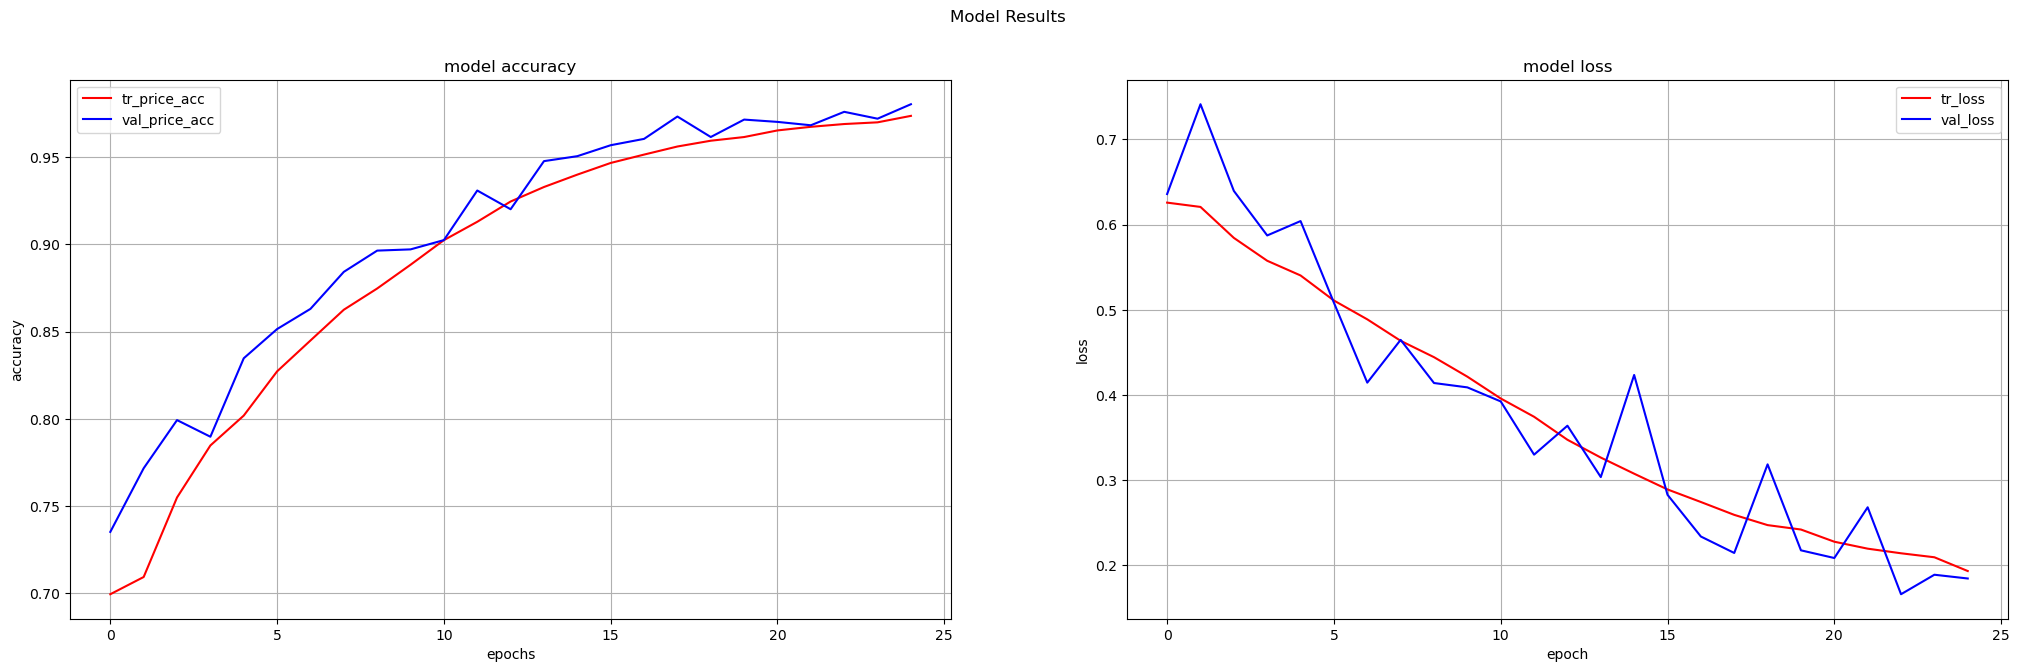

In [54]:
results_virt(history)

**Observation_8**
* First, I used 'GNN_FiLM'.'Graph Neural Networks with Feature-wise Linear Modulation'.

*  I used Adam optimizer I noticed that accuracy was good. 

* The batch size 16 and epoch 25

* I get Score: 0.98 /Public score: 0.85.5

# Trial 9(Apply Upsampling)

* GNN_model is called with the arguments 
    * n=32,
    * condition=True, 
    * dropout_ratio=0, 
    * hidden_layers=15, 
    * mode='mean',  
    * par='RGAT'.Relation-aware Graph Attention Networks

In [29]:
Model_9=GNN_model(32,True,0,15,'mean','RGAT')

In [30]:
summary, csv_file, history = Fit_Pred_Save(Model_9,'adam',16,25,9)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0           ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 embedding (Embedding)          (None, 100)          50000       ['input_1[0][0]']            

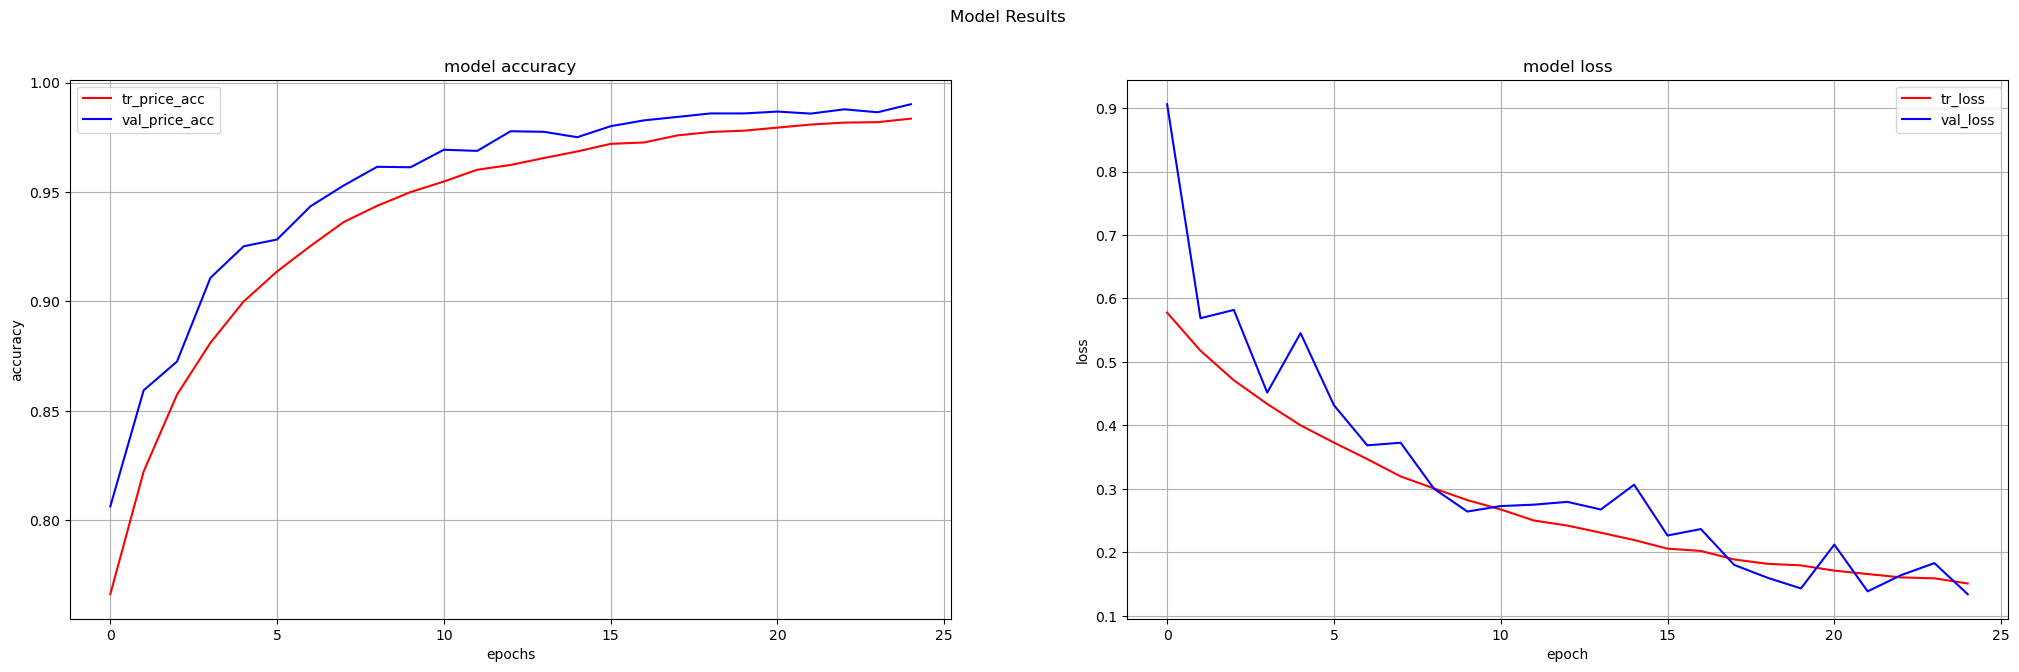

In [31]:
results_virt(history)

**Observation_9**
* First, I used 'RGAT'.Relation-aware Graph Attention Networks.

*  I used Adam optimizer I noticed that accuracy was highly increased again. 

* The batch size 16 and epoch 25

* I get Score: 0.99 /Public score: 0.84

# Trial 10(Apply Upsampling)

* GNN_model is called with the arguments 
    * n=36,
    * condition=True, 
    * dropout_ratio=0
    * hidden_layers=12, 
    * mode='gru',  
    * par='GGNN'. Gated Graph Neural Networks mechanism

In [32]:
Model_10=GNN_model(36,True,0,12,'gru','ggnn')

In [33]:
summary, csv_file, history = Fit_Pred_Save(Model_10,'adam',16,28,10)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()                  0           ['input_6[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_1 (Embedding)        (None, 100)          50000       ['input_4[0][0]']          

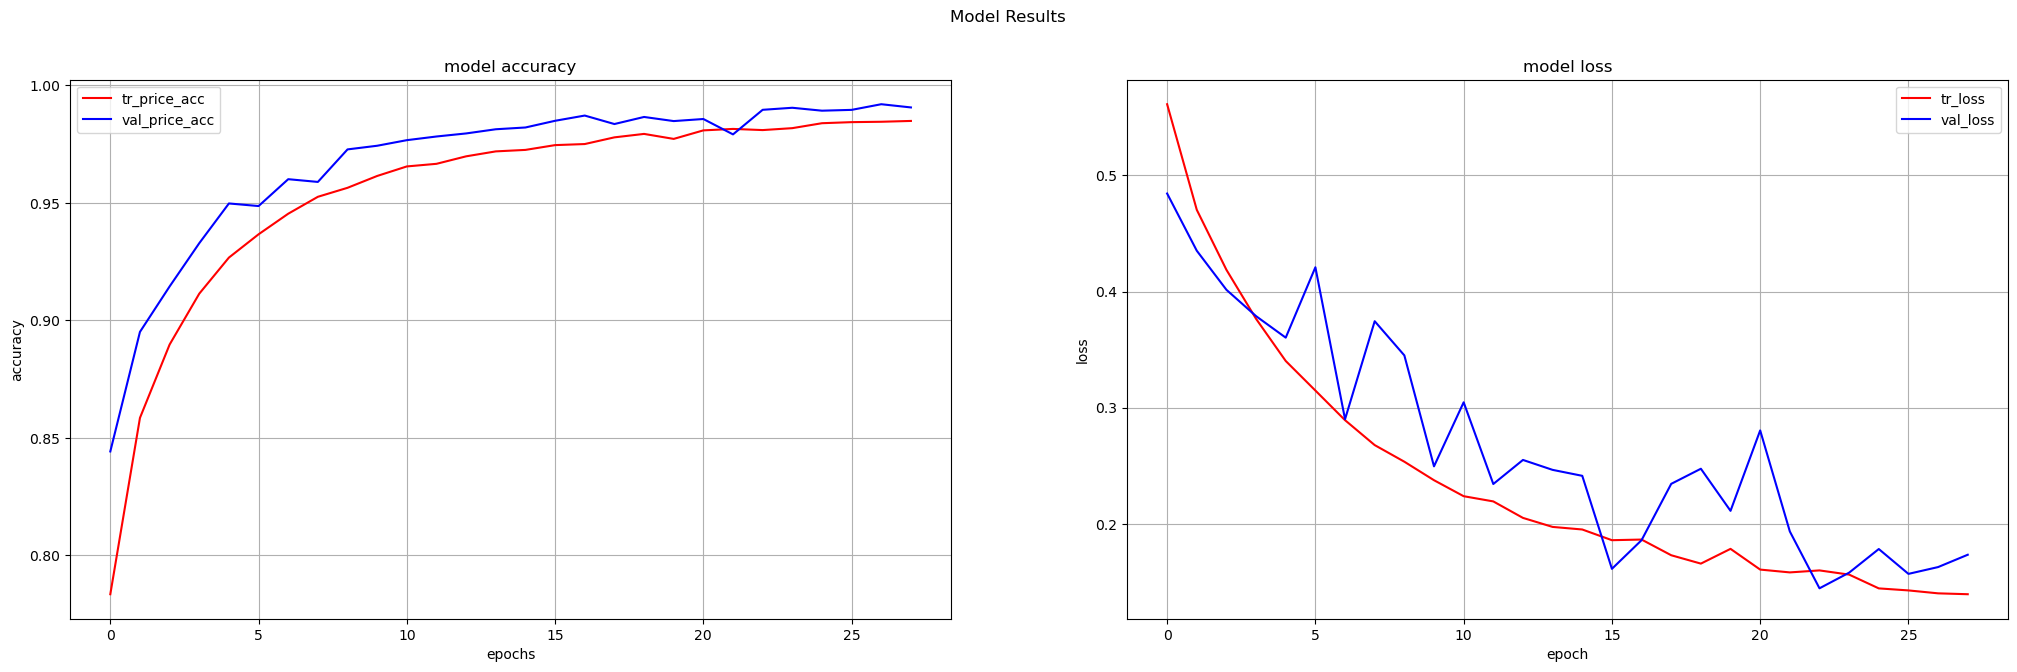

In [34]:
results_virt(history)

**Observation_10**
* First, I used 'GGNN'. Gated Graph Neural Networks mechanism.

*  I used Adam optimizer I noticed that accuracy was highly increased again. 

* The batch size 16 and epoch 28

* I get Score: 0.99 /Public score: 0.8868

5- ✔️ Answer some of questions (briefly)

### 🌈Based on the provided template, describe the format of the input file (sdf file).

**SDF means structure data file. The input file contains information about the chemical compound. SDF file store information about position of individual atom in the chemical compound and also tells about the connections. Different molecules are delimited by '\$' expression.**

### 🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?




**Nodes**: The data contains the nodes of the chemical compound in the tokenized form. 
 
 `The shape of each batch is (batch_size*max_len_nodes), where batch_size is the number of samples in the batch and max_len_nodes is the length of tokenized nodes with padding.`


**Edge**: edge is the input tensor which contains the relation between atoms.

 `The shape of each batch is (sum_of_all_edges,2). The sum_of_all_edges represents the sum edges of each sample of the batch_size.`


**node2graph**: It is the input tensor which is used for segmented mean and contains information about segmented ids. 

 `The shape of each batch is (batch_size*max_len_nodes).`

### 🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?



**gnn_out :** `It represents the aggregation output of the model for each hidden layer.`

**avg :** `It is a way of collecting information for each sample and representing it in the form of mean data.`

### 🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?



**segment_mean** `Takes the mean of the data which have same segmented ids.`

**reduce_mean** `Computes the mean of elements across dimensions of a tensor given the arguments.`

**pred** `The final output shape is a number which represents the probability associated with each chemical compound about its activity.`

### 🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?



`Using multiple gcn helps in incorporating all the graph complexity properly.`

`The default layers are 4 as given in the documentaion.`

______________________________________________________________________________________

`Thank you all . In fact, I was feeling very happy while writing code and feeling the beautiful competitions that creates a great challenge between us.`

`Thank you for your cooperation with us and the comments that helped us more in making the code in an organized and professional manner.` 

`Thanks also to the doctor for his great effort with us. I was hoping that he would complete the next term with us.`